In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from scipy.stats import pareto
import scipy.stats as sts

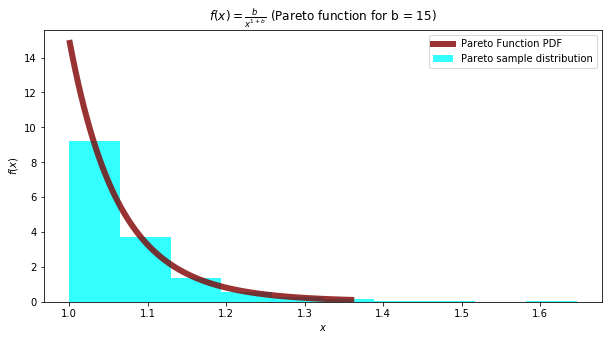

In [2]:

plt.figure(figsize=(10, 5))
b = 15
x = np.linspace(pareto.ppf(0.01, b),
                pareto.ppf(0.99, b),
                100)
y = pareto.pdf(x, b)
plt.plot(x,
         y,
         color='maroon',
         lw=6, alpha=0.8,
         label='Pareto Function PDF'
         )
plt.hist(pareto.rvs(b, size=1000),
         density=True,
         color='aqua',
         histtype='stepfilled',
         alpha=0.8,
         label='Pareto sample distribution'
         )
plt.title(r'$f(x)=\frac{b}{x^{1+b}}$ (Pareto function for b = 15)')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.legend(loc='best')

In [3]:
samples_size_list = [1, 8, 30, 100]
sample_means_count = 1000
sample_mean_matrix = np.zeros((len(samples_size_list), sample_means_count))
for i in range(len(samples_size_list)):
    for j in range(sample_means_count):
        sample_mean_matrix[i, j] = sum(pareto.rvs(b, size=samples_size_list[i])) \
                                   / float(samples_size_list[i])

/home/neighbourhood/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  """


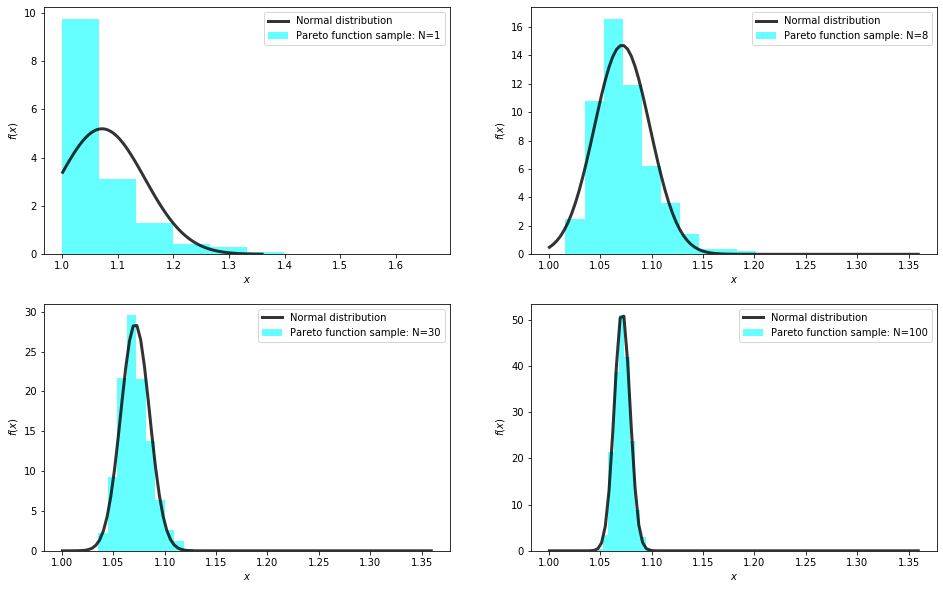

In [4]:
mean, variance = pareto.stats(b, moments='mv')
plt.figure(figsize=(16, 10))
for current_list, i in zip(sample_mean_matrix, range(len(samples_size_list))):
    plt.subplot(2, 2, i + 1)
    fit = sts.norm.pdf(x, mean, sc.sqrt(variance / samples_size_list[i]))
    plt.plot(x,
             fit,
             '-',
             color='black',
             lw=3, alpha=0.8,
             label='Normal distribution'
             )
    plt.hist(current_list,
             histtype='stepfilled',
             color="aqua",
             density=True,
             alpha=0.6,
             label='Pareto function sample: N={0}'.format(samples_size_list[i])
             )
    plt.legend(loc="best")
    plt.xlabel(r'$x$')
    plt.ylabel(r'$f(x)$')


plt.show()
